## Importacion de datos

In [353]:
import pandas as pd
import numpy as np
pd.reset_option("display.max_rows")
pd.set_option('display.max_columns', None)
filename = 'dataset_final_mineria.csv'

df = pd.read_csv(filename, index_col='date_index')
df

,horas_operacion,toneladas,au_cabeza,ag_cabeza,pb_cabeza,zn_cabeza,fe_cabeza,cu_cabeza,au_concentrado_pb,ag_concentrado_pb,pb_concentrado_pb,zn_concentrado_pb,fe_concentrado_pb,cu_concentrado_pb,au_colas_pb,ag_colas_pb,pb_colas_pb,zn_colas_pb,fe_colas_pb,cu_colas_pb,au_concentrado_zn,ag_concentrado_zn,pb_concentrado_zn,zn_concentrado_zn,fe_concentrado_zn,cu_concentrado_zn,au_colas_zn,ag_colas_zn,pb_colas_zn,zn_colas_zn,fe_colas_zn,cu_colas_zn,au_concentrado_fe,ag_concentrado_fe,pb_concentrado_fe,zn_concentrado_fe,fe_concentrado_fe,cu_concentrado_fe,au_colas_fe,ag_colas_fe,pb_colas_fe,zn_colas_fe,fe_colas_fe,cu_colas_fe,au_recuperacion,ag_recuperacion,pb_recuperacion,zn_recuperacion,fe_recuperacion,au_contenido,ag_contenido,pb_contenido,zn_contenido,ag_concentrado_pb_ley,pb_concentrado_pb_ley,zn_concentrado_pb_ley,ag_concentrado_zn_ley,zn_concentrado_zn_ley,au_concentrado_fe_ley,ag_concentrado_fe_ley,fe_concentrado_fe_ley
date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-12-31_2,12.000000,2000.140000,1.292000,381.000000,0.369000,0.935000,5.836500,0.035,36.525,15203.000000,36.670000,9.517857,8.081,0.730000,0.590000,58.00,0.066000,0.871000,5.840000,0.020000,2.483000,1160.301000,0.573000,48.045000,10.341000,0.450000,0.488571,22.615000,0.050000,0.049000,5.255000,0.010000,1.819000,300.743000,0.118000,0.122000,34.329000,0.052071,0.330000,11.983000,0.047000,0.047000,3.811643,0.011143,73.393967,97.127477,82.470137,86.157275,35.769809,2.466148,740.163184,6.082514,16.110122,15203.000176,37.395831,9.863740,1160.300563,46.106445,1.821073,300.742748,34.329813
2024-01-01_1,10.600000,1864.900000,1.550000,392.760000,0.920000,1.640000,5.862000,0.046,37.760,14674.870000,36.160000,11.410000,9.520,1.120000,0.450000,88.99,0.110000,1.610000,5.740000,0.020000,2.200000,1552.110000,0.760000,50.070000,11.370000,0.620000,0.350000,42.390000,0.080000,0.110000,5.170000,0.010000,3.600000,586.380000,0.530000,1.660000,43.580000,0.080000,0.318571,38.441429,0.164286,0.177143,5.118571,0.014286,74.145382,90.778428,87.141268,80.357219,5.241758,1.859966,560.598989,3.535125,6.786663,14674.792915,36.724871,11.256861,1552.184114,48.582151,3.616359,586.616462,43.582684
2024-01-01_2,11.318571,1877.120110,1.332857,426.291429,1.278571,2.327143,7.119429,0.035,26.210,10946.598571,44.602857,9.575714,7.411,0.637143,0.577143,110.82,0.122857,2.077143,6.432857,0.017286,1.914286,1114.352857,0.918571,50.335714,10.344571,0.453857,0.487143,70.234286,0.091429,0.134286,5.802857,0.010286,2.511429,469.117143,0.444286,1.265714,34.221429,0.040714,0.200000,19.700000,0.060000,0.080000,2.970000,0.010000,86.760497,96.172389,91.004434,81.308238,11.007157,2.102133,769.571659,23.708985,35.521526,10946.595426,43.383129,9.575619,1114.336267,50.141669,2.631946,469.281057,33.707583
2024-01-02_1,11.000000,1877.120110,1.030000,395.810000,0.750000,1.520000,5.811000,0.032,35.290,14143.960000,30.370000,9.460000,9.950,0.670000,0.600000,68.25,0.100000,1.250000,5.410000,0.010000,2.200000,1193.580000,1.120000,48.890000,10.710000,0.380000,0.490000,65.420000,0.140000,0.370000,5.110000,0.020000,2.525714,475.288571,0.437143,1.754286,34.919571,0.054143,0.352857,33.511429,0.107143,0.128571,4.365286,0.012571,77.744408,92.346142,85.240427,81.896108,39.632856,1.448779,490.411832,9.175675,1.230279,14143.969033,29.387755,10.151861,1190.693292,37.228279,2.484120,475.772739,33.230792
2024-01-02_2,11.159286,1736.900000,1.040000,350.600000,0.770000,1.490000,5.202000,0.030,31.500,13517.710000,33.270000,8.800000,8.620,0.730000,0.690000,72.49,0.090000,1.540000,5.500000,0.020000,2.160000,918.970000,0.850000,49.075000,10.615000,0.410000,0.450000,38.750000,0.060000,0.190000,4.980000,0.010000,2.861429,669.167143,0.622857,2.000000,35.660857,0.050000,0.341429,29.975714,0.094286,0.102857,4.125286,0.009714,67.526161,92.058858,87.658663,81.896108,8.851226,1.315130,560.598989,11.885997,24.584883,13517.777641,33.083715,8.652609,919.013092,37.709881,2.908470,668.687482,35.788442
...,...,...,...,...,...,...,...,.

In [355]:
# Eliminamos la columna 'date_index'
df = df.reset_index(drop=True)

In [584]:
# Lista de columnas objetivo
columnas_objetivo = [
    'au_recuperacion', 'ag_recuperacion', 'pb_recuperacion', 'zn_recuperacion', 'fe_recuperacion',
    'au_contenido', 'ag_contenido', 'pb_contenido', 'zn_contenido',
    'ag_concentrado_pb_ley', 'pb_concentrado_pb_ley', 'zn_concentrado_pb_ley',
    'ag_concentrado_zn_ley', 'zn_concentrado_zn_ley',
    'au_concentrado_fe_ley', 'ag_concentrado_fe_ley', 'fe_concentrado_fe_ley'
]

# Mantener solo 'au_recuperacion' y eliminar las demás columnas objetivo
columnas_a_eliminar = [col for col in columnas_objetivo if col != 'au_recuperacion']
df_au = df.drop(columns=columnas_a_eliminar)
df_au

,horas_operacion,toneladas,au_cabeza,ag_cabeza,pb_cabeza,zn_cabeza,fe_cabeza,cu_cabeza,au_concentrado_pb,ag_concentrado_pb,pb_concentrado_pb,zn_concentrado_pb,fe_concentrado_pb,cu_concentrado_pb,au_colas_pb,ag_colas_pb,pb_colas_pb,zn_colas_pb,fe_colas_pb,cu_colas_pb,au_concentrado_zn,ag_concentrado_zn,pb_concentrado_zn,zn_concentrado_zn,fe_concentrado_zn,cu_concentrado_zn,au_colas_zn,ag_colas_zn,pb_colas_zn,zn_colas_zn,fe_colas_zn,cu_colas_zn,au_concentrado_fe,ag_concentrado_fe,pb_concentrado_fe,zn_concentrado_fe,fe_concentrado_fe,cu_concentrado_fe,au_colas_fe,ag_colas_fe,pb_colas_fe,zn_colas_fe,fe_colas_fe,cu_colas_fe,au_recuperacion
0,12.000000,2000.140000,1.292000,381.000000,0.369000,0.935000,5.836500,0.035,36.525,15203.000000,36.670000,9.517857,8.081,0.730000,0.590000,58.00,0.066000,0.871000,5.840000,0.020000,2.483000,1160.301000,0.573000,48.045000,10.341000,0.450000,0.488571,22.615000,0.050000,0.049000,5.255000,0.010000,1.819000,300.743000,0.118000,0.122000,34.329000,0.052071,0.330000,11.983000,0.047000,0.047000,3.811643,0.011143,73.393967
1,10.600000,1864.900000,1.550000,392.760000,0.920000,1.640000,5.862000,0.046,37.760,14674.870000,36.160000,11.410000,9.520,1.120000,0.450000,88.99,0.110000,1.610000,5.740000,0.020000,2.200000,1552.110000,0.760000,50.070000,11.370000,0.620000,0.350000,42.390000,0.080000,0.110000,5.170000,0.010000,3.600000,586.380000,0.530000,1.660000,43.580000,0.080000,0.318571,38.441429,0.164286,0.177143,5.118571,0.014286,74.145382
2,11.318571,1877.120110,1.332857,426.291429,1.278571,2.327143,7.119429,0.035,26.210,10946.598571,44.602857,9.575714,7.411,0.637143,0.577143,110.82,0.122857,2.077143,6.432857,0.017286,1.914286,1114.352857,0.918571,50.335714,10.344571,0.453857,0.487143,70.234286,0.091429,0.134286,5.802857,0.010286,2.511429,469.117143,0.444286,1.265714,34.221429,0.040714,0.200000,19.700000,0.060000,0.080000,2.970000,0.010000,86.760497
3,11.000000,1877.120110,1.030000,395.810000,0.750000,1.520000,5.811000,0.032,35.290,14143.960000,30.370000,9.460000,9.950,0.670000,0.600000,68.25,0.100000,1.250000,5.410000,0.010000,2.200000,1193.580000,1.120000,48.890000,10.710000,0.380000,0.490000,65.420000,0.140000,0.370000,5.110000,0.020000,2.525714,475.288571,0.437143,1.754286,34.919571,0.054143,0.352857,33.511429,0.107143,0.128571,4.365286,0.012571,77.744408
4,11.159286,1736.900000,1.040000,350.600000,0.770000,1.490000,5.202000,0.030,31.500,13517.710000,33.270000,8.800000,8.620,0.730000,0.690000,72.49,0.090000,1.540000,5.500000,0.020000,2.160000,918.970000,0.850000,49.075000,10.615000,0.410000,0.450000,38.750000,0.060000,0.190000,4.980000,0.010000,2.861429,669.167143,0.622857,2.000000,35.660857,0.050000,0.341429,29.975714,0.094286,0.102857,4.125286,0.009714,67.526161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,10.828571,1985.050617,1.560000,362.320000,1.550000,2.320000,6.405000,0.056,35.040,11573.050000,57.440000,8.550000,6.365,0.940000,0.750000,132.52,0.330000,2.360000,6.540000,0.040000,3.030000,1211.415000,2.010000,47.275000,9.950000,0.550000,0.530000,69.670000,0.190000,0.305000,5.920000,0.020000,2.890000,1046.110000,1.470000,8.410000,27.330000,0.195000,0.530000,70.250000,0.220000,0.210000,6.740000,0.010000,60.312165
545,10.928571,2080.121574,1.395000,330.720000,1.540000,2.360000,6.767000,0.058,30.640,9283.250000,52.590000,12.150000,6.350,1.060000,0.590000,102.10,0.270000,2.100000,7.450000,0.030000,2.200000,1229.230000,2.010000,47.480000,10.840000,0.570000,0.470000,64.880000,0.190000,0.300000,7.300000,0.020000,1.790000,816.970000,0.720000,8.630000,27.380000,0.220000,0.430000,56.410000,0.200000,0.230000,7.420000,0.010000,67.348243
546,11.100000,2012.237300,1.445000,414.250000,1.280000,1.910000,5.084000,0.041,26.730,9337.060000,58.320000,8.900000,5.320,1.060000,0.630000,130.39,0.410000,3.100000,8.530000,0.040000,2.940000,1229.230000,2.315000,47.480000,11.030000,0.6300

In [586]:
def train_val_test_split(df, tr_size=0.8, vl_size=0.1, ts_size=0.1):
    #Definimos el numero de datos en cada subserie
    N = df.shape[0]
    Ntrain = int(tr_size*N)
    Nval = int(vl_size*N)
    Ntst = N - Ntrain - Nval

    # Realizar particion
    train = df[0:Ntrain]
    val = df[Ntrain:Ntrain+Nval]
    test = df[Ntrain+Nval:]

    return train, val, test

In [588]:
tr, vl, ts = train_val_test_split(df_au)
print(f"tam set de entrenamiento: {tr.shape}")
print(f"tam set de validacion: {vl.shape}")
print(f"tam set de test: {ts.shape}")

tam set de entrenamiento: (439, 45)
tam set de validacion: (54, 45)
tam set de test: (56, 45)


In [590]:
import numpy as np

def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado <-- <--- ¡esta parte de la función se ejecuta en este caso!
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+INPUT_LENGTH,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,-1].reshape(output_length,1))
    
    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)
    
    return X, Y

In [632]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 4    # Hiperparámetro
OUTPUT_LENGTH = 1    # Modelo multi-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (434, 4, 45), y_tr: (434, 1, 1)
Set de validación - x_vl: (49, 4, 45), y_vl: (49, 1, 1)
Set de prueba - x_ts: (51, 4, 45), y_ts: (51, 1, 1)


In [634]:
from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input, col_ref):
    '''Escala el dataset en el rango de -1 a 1.

    Entradas:
    - data_input: diccionario con los dataset de entrada y salida del modelo
    (data_input = {'x_tr':x_tr, 'y_tr':y_tr, 'x_vl':x_vl, 'y_vl':y_vl,
                    'y_ts':y_ts})
    - col_ref: parámetro adicional para especificar la columna que contiene
      la variable a predecir

    
    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    '''

    # *** Implementación adicional: determinar el índice de la columna
    # que contiene la variable a predecir
    col_ref = df.columns.get_loc(col_ref)

    # Número de instantes de tiempo de entrada y de covariables
    NSAMPLES = data_input['x_tr'].shape[1]
    NFEATS = data_input['x_tr'].shape[2]

    # Generar listado con "scalers" (1 por cada covariable de entrada)
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento: se usarán los min/max del set de entrenamiento para
    # escalar la totalidad de los datasets

    # Escalamiento Xs
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])
    
    # Escalamiento Ys (teniendo en cuenta "col_ind")
    y_tr_s[:,:,0] = scalers[col_ref].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[col_ref].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[col_ref].transform(y_ts[:,:,0])

    # Conformar diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[col_ref]

In [636]:
# Escalamiento del dataset con la función anterior

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar (especificando la columna con la variable a predecir)
data_s, scaler = escalar_dataset(data_in, col_ref = 'au_recuperacion' )

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of labels (61).

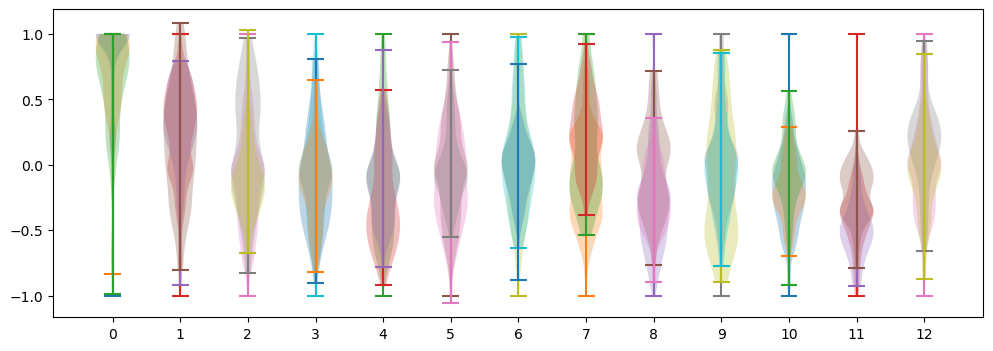

In [638]:
# Y generemos una gráfica tipo violín para ver la distribución
# de los valores en cada covariable (entrada) y en la variable a
# predecir (salida)

fig, ax = plt.subplots(figsize=(12,4))
for i in range(13):
    ax.violinplot(dataset=x_tr_s[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_vl_s[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_ts_s[:,:,i].flatten(), positions=[i])

# Etiquetas eje horizontal
ax.set_xticks(list(range(13)))
ax.set_xticklabels(df.keys(), rotation=90)
ax.autoscale();

In [ ]:
# Y hagamos lo mismo con la variable de salida:
fig, ax = plt.subplots(figsize=(6,4))
ax.violinplot(dataset=y_tr_s.flatten())
ax.violinplot(dataset=y_vl_s.flatten())
ax.violinplot(dataset=y_ts_s.flatten())
ax.set_xticks([1])
ax.set_xticklabels(['y (salida)']);

## Entrenamiento del Modelo

In [642]:
# Creación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# El modelo
N_UNITS = 128 # Tamaño del estado oculto (h) y de la celdad de memoria (c) (128)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 5 dias x 45 (features)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))

# Y lo único que cambia con respecto al modelo multivariado + multi-step es
# el tamaño deldato de salida (4 horas)
modelo.add(Dense(OUTPUT_LENGTH, activation='linear')) # activation = 'linear' pues queremos pronosticar (regresión)

# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

# Compilación
optimizador = RMSprop(learning_rate=5e-4) # 5e-5
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)

# Entrenamiento (aproximadamente 1 min usando GPU)
EPOCHS = 100 # Hiperparámetro
BATCH_SIZE = 256 # Hiperparámetro
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)

Epoch 1/100


D:\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 2s - 864ms/step - loss: 0.3939 - val_loss: 0.4724
Epoch 2/100
2/2 - 0s - 52ms/step - loss: 0.3730 - val_loss: 0.4651
Epoch 3/100
2/2 - 0s - 51ms/step - loss: 0.3645 - val_loss: 0.4592
Epoch 4/100
2/2 - 0s - 50ms/step - loss: 0.3595 - val_loss: 0.4541
Epoch 5/100
2/2 - 0s - 49ms/step - loss: 0.3556 - val_loss: 0.4500
Epoch 6/100
2/2 - 0s - 51ms/step - loss: 0.3524 - val_loss: 0.4467
Epoch 7/100
2/2 - 0s - 50ms/step - loss: 0.3496 - val_loss: 0.4441
Epoch 8/100
2/2 - 0s - 50ms/step - loss: 0.3471 - val_loss: 0.4421
Epoch 9/100
2/2 - 0s - 51ms/step - loss: 0.3449 - val_loss: 0.4405
Epoch 10/100
2/2 - 0s - 50ms/step - loss: 0.3430 - val_loss: 0.4395
Epoch 11/100
2/2 - 0s - 50ms/step - loss: 0.3412 - val_loss: 0.4388
Epoch 12/100
2/2 - 0s - 50ms/step - loss: 0.3396 - val_loss: 0.4384
Epoch 13/100
2/2 - 0s - 50ms/step - loss: 0.3381 - val_loss: 0.4384
Epoch 14/100
2/2 - 0s - 50ms/step - loss: 0.3367 - val_loss: 0.4386
Epoch 15/100
2/2 - 0s - 49ms/step - loss: 0.3354 - val_loss: 0.4390


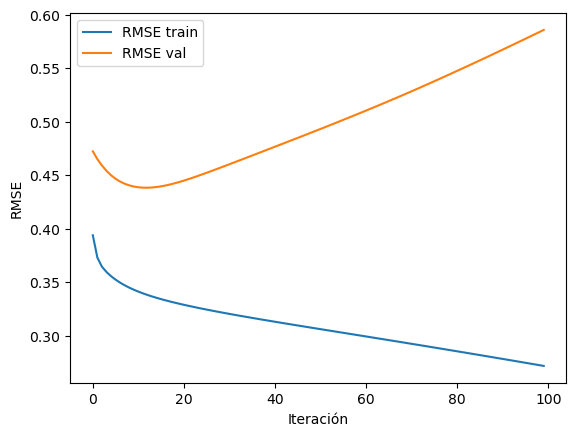

In [644]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

## Evaluacion del modelo

In [647]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.267
  RMSE val:	 0.577
  RMSE test:	 0.562


Forma de y_ts_s: (51, 1, 1)
Forma de y_ts_pred_s: (51, 1)


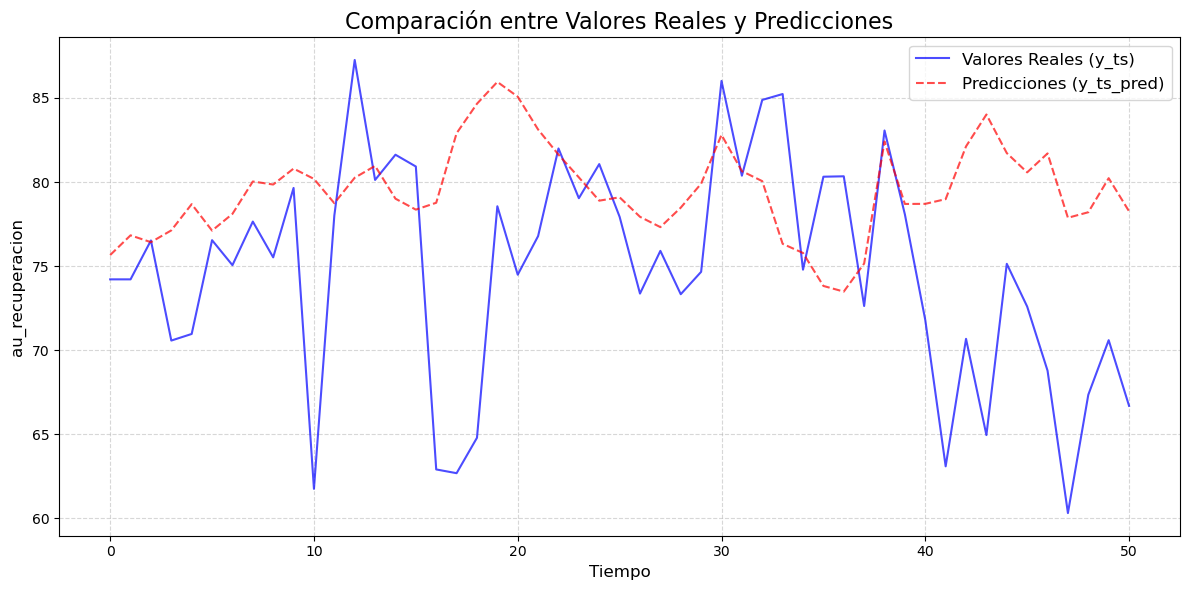

In [649]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generar las predicciones sobre el set de prueba
y_ts_pred_s = modelo.predict(x_ts_s, verbose=0)

# 2. Verificar las formas de los arrays
print(f"Forma de y_ts_s: {y_ts_s.shape}")
print(f"Forma de y_ts_pred_s: {y_ts_pred_s.shape}")

# 3. Ajustar las formas si es necesario
if len(y_ts_s.shape) == 3:
    y_ts_s = np.squeeze(y_ts_s, axis=-1)
if len(y_ts_pred_s.shape) == 3:
    y_ts_pred_s = np.squeeze(y_ts_pred_s, axis=-1)

# 4. Realizar la transformación inversa de las predicciones
y_ts_original = scaler.inverse_transform(y_ts_s)
y_ts_pred = scaler.inverse_transform(y_ts_pred_s)

# 5. Graficar los datos de prueba y las predicciones
plt.figure(figsize=(12, 6))

# Graficar los datos de prueba (valores reales)
plt.plot(y_ts_original[:, 0], label='Valores Reales (y_ts)', color='blue', alpha=0.7)

# Graficar las predicciones del modelo
plt.plot(y_ts_pred[:, 0], label='Predicciones (y_ts_pred)', color='red', linestyle='--', alpha=0.7)

# Personalizar la gráfica
plt.title('Comparación entre Valores Reales y Predicciones', fontsize=16)
plt.xlabel('Tiempo', fontsize=12)
plt.ylabel('au_recuperacion', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar la gráfica
plt.show()